In [1]:
from unidec_modules.ChromEng2 import *
import plate_map2 as pm2

In [2]:
spectra_path = "C:\\Users\\cm19ljc\\Documents\\GitHub\\UniDec\\mzML\\mzML.mzML"
map_path = "unichrom plate map example.xlsx"

In [3]:
eng = ChromEngine()
eng.load_mzml(spectra_path)
eng.config.chrom_peak_width = 0.05
eng.get_chrom_peaks() # INSERT PLOT HERE


UniDec Engine v.4.4.0

UniDec Path: C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_bin\UniDec.exe

UniDec Engine v.4.4.0

UniDec Path: C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_bin\UniDec.exe
Opening HDF5 File: C:\Users\cm19ljc\Documents\GitHub\UniDec\mzML\mzML.hdf5
Reading mzML: C:\Users\cm19ljc\Documents\GitHub\UniDec\mzML\mzML.mzML
[Warning] Not index found and build_index_from_scratch is False
Converted to gzip file to improve speed: C:\Users\cm19ljc\Documents\GitHub\UniDec\mzML\mzML.mzML.gz
Error getting TIC in mzML; trying to make it...
Imported Data. Constructing TIC
Done
1070 2
Noise Level: 0.03357343719702872 Window: 0.05
Bad Peak [0.419567   0.30422294] 0.23768299999999998 [0.419567, 0.65725]
Bad Peak [0.602767   0.24142904] 0.24183299999999996 [0.419567, 0.6614]
0.702967 0.14128400000000008
0.790233 0.16205000000000003
1.0312 0.13711000000000007
1.95747 0.1411800000000003
2.88835 0.13712999999999997
Bad Peak [3.76958    0.03455761] 0.8769500000000003 [3.7197, 4.59665

([array([0.702967  , 0.13838679]),
  array([0.790233  , 0.09750636]),
  array([1.0312    , 0.74873995]),
  array([1.95747   , 0.88543616]),
  array([2.88835, 1.     ])],
 [[0.686333, 0.827617],
  [0.682183, 0.844233],
  [1.00212, 1.13923],
  [1.9284, 2.06958],
  [2.85927, 2.9964]])

In [4]:
TIC_min = 1 # ADD TO PACKAGE
tranges = eng.chrompeaks_tranges
eng.chrompeaks_tranges = [t for t in tranges if all(i > TIC_min for i in t)] # INSERT PLOT HERE
eng.chrompeaks_tranges

[[1.00212, 1.13923], [1.9284, 2.06958], [2.85927, 2.9964]]

In [5]:
# eng.config.sw_scan_offset = 0 # ??? defaults to 10

eng.add_chrom_peaks2() # stores data from selected peaks ready for metaunidec processing

Getting scans: [98, 131]
Length merge axis: 28915
Getting scans: [321, 355]
Length merge axis: 30293
Getting scans: [545, 578]
Length merge axis: 31336


In [6]:
eng.config.subtype = 2 # background subtraction - subtract curved
eng.config.subbuff = 100 # background subtraction amount(subtract curved) 0 = 0ff, 100 = good amount when on
eng.config.datanorm = 0 # turn off data normalisation

# -- Deconvolution
eng.config.numit = 100 # number of iterations

# mass range (default = 5000.0 to 500000.0 Da)
eng.config.massub = 15000 # upper 
eng.config.masslb = 11000 # lower

eng.config.massbins = 0.1 # sample mass every 0.1 Da

# FWHM 
# eng.get_auto_peak_width()
eng.config.mzsig = 0 

# charge range
eng.config.startz = 1
eng.config.endz = 30

# smoothing 
eng.config.zzsig = 1 # charge smooth width (smooth charge state distributions)
eng.config.psig = 1 # smooth nearby points (point smooth width, some = 1)
eng.config.beta = 0 # suppress artifacts (beta, some = 50)

eng.config.psfun = 0 # Peak shape function (gaussian, lorentzian, split G/L)

# -- Peak Selection and plotting
eng.config.peaknorm = 0 # Normalise peaks (0 = off)
eng.config.datanorm = 0
eng.config.peakwindow = 10 # peak window / Da
eng.config.exnorm = 0 # extract normalisation
eng.config.peakthresh = 0.05
# eng.config.nativeub = 10
# eng.config.nativelb = -10
eng.data.export_hdf5()

In [7]:
eng.process_data()
eng.run_unidec()
eng.pick_peaks() 

Execution Time: 0.08299589999999846
Execution Time: 2.3685760999999985
Execution Time: 0.15343830000000125
Peak info saved to: C:\Users\cm19ljc\Documents\GitHub\UniDec\mzML\UniDec_Figures_and_Files\mzML_extracts.txt


In [8]:
# PLATE MAP PROCESSING STARTS HERE
rmap, pmap = pm2.read_in_long(map_path)
data_dict, length = pm2.process_data(rmap, pmap)
data_dict 

{'17-05-21-CTB1': {'CTB': {'Reaction': '17-05-21-CTB1',
   'Species': 'CTB',
   'Concentration': 10.0,
   'Units': 'uM',
   'Mass': 13321.0,
   'Reagent_Type': 'SM',
   'Sequence': nan,
   'Time': A1     0
   A2    30
   A3    60
   Name: Time, dtype: object,
   'spectra': {'A1': '0', 'A2': '30', 'A3': '60'},
   'peaks': {'A1': '0', 'A2': '30', 'A3': '60'}},
  'CTB-GV': {'Reaction': '17-05-21-CTB1',
   'Species': 'CTB-GV',
   'Concentration': nan,
   'Units': 'uM',
   'Mass': 13627.0,
   'Reagent_Type': 'P',
   'Sequence': nan,
   'Time': A1     0
   A2    30
   A3    60
   Name: Time, dtype: object,
   'spectra': {'A1': '0', 'A2': '30', 'A3': '60'},
   'peaks': {'A1': '0', 'A2': '30', 'A3': '60'}},
  'GVYQSRL': {'Reaction': '17-05-21-CTB1',
   'Species': 'GVYQSRL',
   'Concentration': 10.0,
   'Units': 'uM',
   'Mass': 13184.0,
   'Reagent_Type': 'SM',
   'Sequence': 'GVYQSRL',
   'Time': A1     0
   A2    30
   A3    60
   Name: Time, dtype: object,
   'spectra': {'A1': '0', 'A2': '3

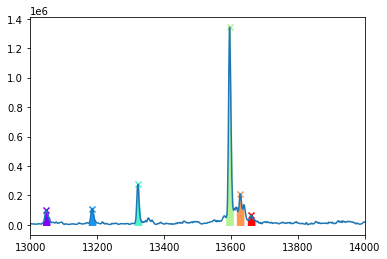

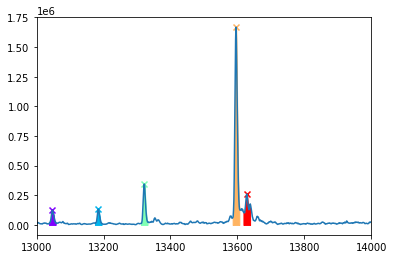

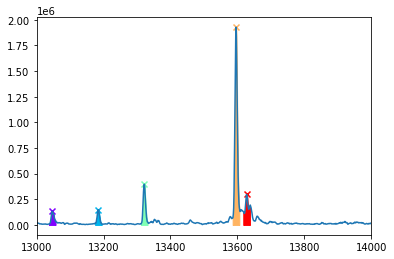

In [9]:
eng = pm2.integrate_all(eng) # ADD TO UNICHROM
pm2.plot_all(eng, xlim = [13000, 14000])

In [10]:
eng = pm2.update_vars(eng, pmap, skip_empty = True)

In [11]:
data_dict

{'17-05-21-CTB1': {'CTB': {'Reaction': '17-05-21-CTB1',
   'Species': 'CTB',
   'Concentration': 10.0,
   'Units': 'uM',
   'Mass': 13321.0,
   'Reagent_Type': 'SM',
   'Sequence': nan,
   'Time': A1     0
   A2    30
   A3    60
   Name: Time, dtype: object,
   'spectra': {'A1': '0', 'A2': '30', 'A3': '60'},
   'peaks': {'A1': '0', 'A2': '30', 'A3': '60'}},
  'CTB-GV': {'Reaction': '17-05-21-CTB1',
   'Species': 'CTB-GV',
   'Concentration': nan,
   'Units': 'uM',
   'Mass': 13627.0,
   'Reagent_Type': 'P',
   'Sequence': nan,
   'Time': A1     0
   A2    30
   A3    60
   Name: Time, dtype: object,
   'spectra': {'A1': '0', 'A2': '30', 'A3': '60'},
   'peaks': {'A1': '0', 'A2': '30', 'A3': '60'}},
  'GVYQSRL': {'Reaction': '17-05-21-CTB1',
   'Species': 'GVYQSRL',
   'Concentration': 10.0,
   'Units': 'uM',
   'Mass': 13184.0,
   'Reagent_Type': 'SM',
   'Sequence': 'GVYQSRL',
   'Time': A1     0
   A2    30
   A3    60
   Name: Time, dtype: object,
   'spectra': {'A1': '0', 'A2': '3

In [12]:
# # label spectra with well ID (or time?)
# spectra_dict = {s.var1:s for s in eng.data.spectra}
# spectra_dict

In [13]:
# adds spectra for each time point/well to each species
data_dict = pm2.export_spectra(eng, data_dict) 
data_dict

{'17-05-21-CTB1': {'CTB': {'Reaction': '17-05-21-CTB1',
   'Species': 'CTB',
   'Concentration': 10.0,
   'Units': 'uM',
   'Mass': 13321.0,
   'Reagent_Type': 'SM',
   'Sequence': nan,
   'Time': A1     0
   A2    30
   A3    60
   Name: Time, dtype: object,
   'spectra': {'A1': <metaunidec.mudstruct.Spectrum at 0x20153ae71f0>,
    'A2': <metaunidec.mudstruct.Spectrum at 0x201026069d0>,
    'A3': <metaunidec.mudstruct.Spectrum at 0x20102606fa0>},
   'peaks': {'A1': '0', 'A2': '30', 'A3': '60'}},
  'CTB-GV': {'Reaction': '17-05-21-CTB1',
   'Species': 'CTB-GV',
   'Concentration': nan,
   'Units': 'uM',
   'Mass': 13627.0,
   'Reagent_Type': 'P',
   'Sequence': nan,
   'Time': A1     0
   A2    30
   A3    60
   Name: Time, dtype: object,
   'spectra': {'A1': <metaunidec.mudstruct.Spectrum at 0x20153ae71f0>,
    'A2': <metaunidec.mudstruct.Spectrum at 0x201026069d0>,
    'A3': <metaunidec.mudstruct.Spectrum at 0x20102606fa0>},
   'peaks': {'A1': '0', 'A2': '30', 'A3': '60'}},
  'GVYQSR

In [14]:
data = np.array([1, 4, 6, 7])
theory = np.array([0.9, 3, 6, 8.3, 5.1])
theoryname = np.array(["sm1", "sm2", "p2", "p3", "bp"])
x, y = np.meshgrid(data, theory)
diff  = abs(x - y)
diff[diff > 1.1] = np.nan
diff
try:
    mins = np.nanargmin(diff, axis = 0)
    peaks = theoryname[mins]
except:
    mins = [np.nanargmin(i) for i in diff if np.isnan(i).all() == False]
    peaks = theoryname[mins]
    
print(peaks)
print(mins)
print(diff)

['sm1' 'sm2' 'p2' 'p2']
[0 1 2 2]
[[0.1 nan nan nan]
 [nan 1.  nan nan]
 [nan nan 0.  1. ]
 [nan nan nan nan]
 [nan 1.1 0.9 nan]]


In [15]:
np.all(diff ==np.nan)

False

In [16]:
np.nanargmin(diff, axis = 0)

array([0, 1, 2, 2], dtype=int64)

In [22]:
print(data, theory)

[1 4 6 7] [0.9 3.  6.  8.3 5.1]


In [18]:
x

array([[1, 4, 6, 7],
       [1, 4, 6, 7],
       [1, 4, 6, 7],
       [1, 4, 6, 7],
       [1, 4, 6, 7]])

In [19]:
y

array([[0.9, 0.9, 0.9, 0.9],
       [3. , 3. , 3. , 3. ],
       [6. , 6. , 6. , 6. ],
       [8.3, 8.3, 8.3, 8.3],
       [5.1, 5.1, 5.1, 5.1]])

In [20]:
abs(x-y)

array([[0.1, 3.1, 5.1, 6.1],
       [2. , 1. , 3. , 4. ],
       [5. , 2. , 0. , 1. ],
       [7.3, 4.3, 2.3, 1.3],
       [4.1, 1.1, 0.9, 1.9]])

In [21]:
# matches mass given in species map to peaks
data_dict, eng = pm2.match_peaks(eng, data_dict)
data_dict

Mass 13321.70 Da matched to Species CTB with mass 13321.0 Da


KeyError: 'Reaction Name'